In [1]:
from utils.query_db import db_connection
from IPython.display import Image

### **`WHERE`** clause

In [2]:
with db_connection() as conn:
    conn.fetch_all("""SELECT first_name, 
                             last_name 
                      FROM actor
                      WHERE first_name = 'Nick';""")

,first_name,last_name
0,Nick,Wahlberg
1,Nick,Stallone
2,Nick,Degeneres


With **`AND`** conditional.

In [3]:
with db_connection() as conn:
    conn.fetch_all("""SELECT * FROM film
                      WHERE rental_rate > 4 
                          AND replacement_cost >= 19.99 
                          AND rating = 'R';""")

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58.951,[Behind the Scenes],'australia':18 'cat':8 'drama':5 'epic':4 'exp...
1,20,Amelie Hellfighters,A Boring Drama of a Woman And a Squirrel who m...,2006,1,4,4.99,79,23.99,R,2013-05-26 14:50:58.951,"[Commentaries, Deleted Scenes, Behind the Scenes]",'ameli':1 'baloon':19 'bore':4 'conquer':14 'd...
2,60,Beast Hunchback,A Awe-Inspiring Epistle of a Student And a Squ...,2006,1,3,4.99,89,22.99,R,2013-05-26 14:50:58.951,"[Deleted Scenes, Behind the Scenes]",'ancient':20 'awe':5 'awe-inspir':4 'beast':1 ...
3,100,Brooklyn Desert,A Beautiful Drama of a Dentist And a Composer ...,2006,1,7,4.99,161,21.99,R,2013-05-26 14:50:58.951,[Commentaries],'battl':14 'beauti':4 'brooklyn':1 'compos':11...
4,102,Bubble Grosse,A Awe-Inspiring Panorama of a Crocodile And a ...,2006,1,4,4.99,60,20.99,R,2013-05-26 14:50:58.951,"[Trailers, Commentaries, Deleted Scenes, Behin...",'awe':5 'awe-inspir':4 'baloon':21 'bubbl':1 '...
5,177,Connecticut Tramp,A Unbelieveable Drama of a Crocodile And a Mad...,2006,1,4,4.99,172,20.99,R,2013-05-26 14:50:58.951,"[Commentaries, Deleted Scenes]",'connecticut':1 'cow':12 'crocodil':8 'dentist...
6,192,Crossing Divorce,A Beautiful Documentary of a Dog And a Robot w...,2006,1,4,4.99,50,19.99,R,2013-05-26 14:50:58.951,"[Commentaries, Deleted Scenes, Behind the Scenes]",'beauti':4 'berlin':18 'cross':1 'divorc':2 'd...
7,222,Desert Poseidon,A Brilliant Documentary of a Butler And a Fris...,2006,1,4,4.99,64,27.99,R,2013-05-26 14:50:58.951,"[Trailers, Behind the Scenes]",'astronaut':16 'brilliant':4 'build':14 'butle...
8,256,Drop Waterfront,A Fanciful Documentary of a Husband And a Expl...,2006,1,6,4.99,178,20.99,R,2013-05-26 14:50:58.951,"[Trailers, Commentaries]",'ancient':18 'china':19 'documentari':5 'drop'...
9,310,Fever Empire,A Insightful Panorama of a Cat And a Boat who ...,2006,1,5,4.99,158,20.99,R,2013-05-26 14:50:58.951,"[Commentaries, Deleted Scenes]","'boat':11,16 'cat':8 'defeat':14 'empir':2 'fe..."


In [4]:
with db_connection() as conn:
    conn.fetch_all("""SELECT COUNT(title) FROM film
                      WHERE rental_rate > 4 
                          AND replacement_cost >= 19.99 
                          AND rating = 'R';""")

,count
0,34


With **`OR`** conditional.

In [5]:
with db_connection() as conn:
    conn.fetch_all("""SELECT COUNT(title) FROM film
                      WHERE rating = 'R'
                          OR rating = 'PG-13';""")

,count
0,418


With **`NOT`** conditional.

In [6]:
with db_connection() as conn:
    conn.fetch_all("""SELECT COUNT(title) FROM film
                      WHERE rating != 'R'
                          OR rating = 'PG-13';""")

,count
0,805


#### **`SELECT WHERE`** challenge

In [7]:
with db_connection() as conn:
    conn.fetch_all("""SELECT email FROM customer
                      WHERE first_name = 'Nancy'
                          AND last_name = 'Thomas';""")

,email
0,nancy.thomas@sakilacustomer.org


In [8]:
import pandas as pd

with (db_connection() as conn,
      pd.option_context("max_colwidth", None)):
    
    conn.fetch_all("""SELECT description FROM film
                      WHERE title = 'Outlaw Hanky';""")

,description
0,A Thoughtful Story of a Astronaut And a Composer who must Conquer a Dog in The Sahara Desert


In [9]:
with db_connection() as conn:
    conn.fetch_all("""SELECT phone FROM address
                      WHERE address = '259 Ipoh Drive';""")

,phone
0,419009857119


### **`HAVING`** clause

The **`HAVING`** clause allows us to filter results *after* an aggregation has already taken place. **`HAVING`** allows us to use aggregate results as filter along with a **`GROUP BY`**.

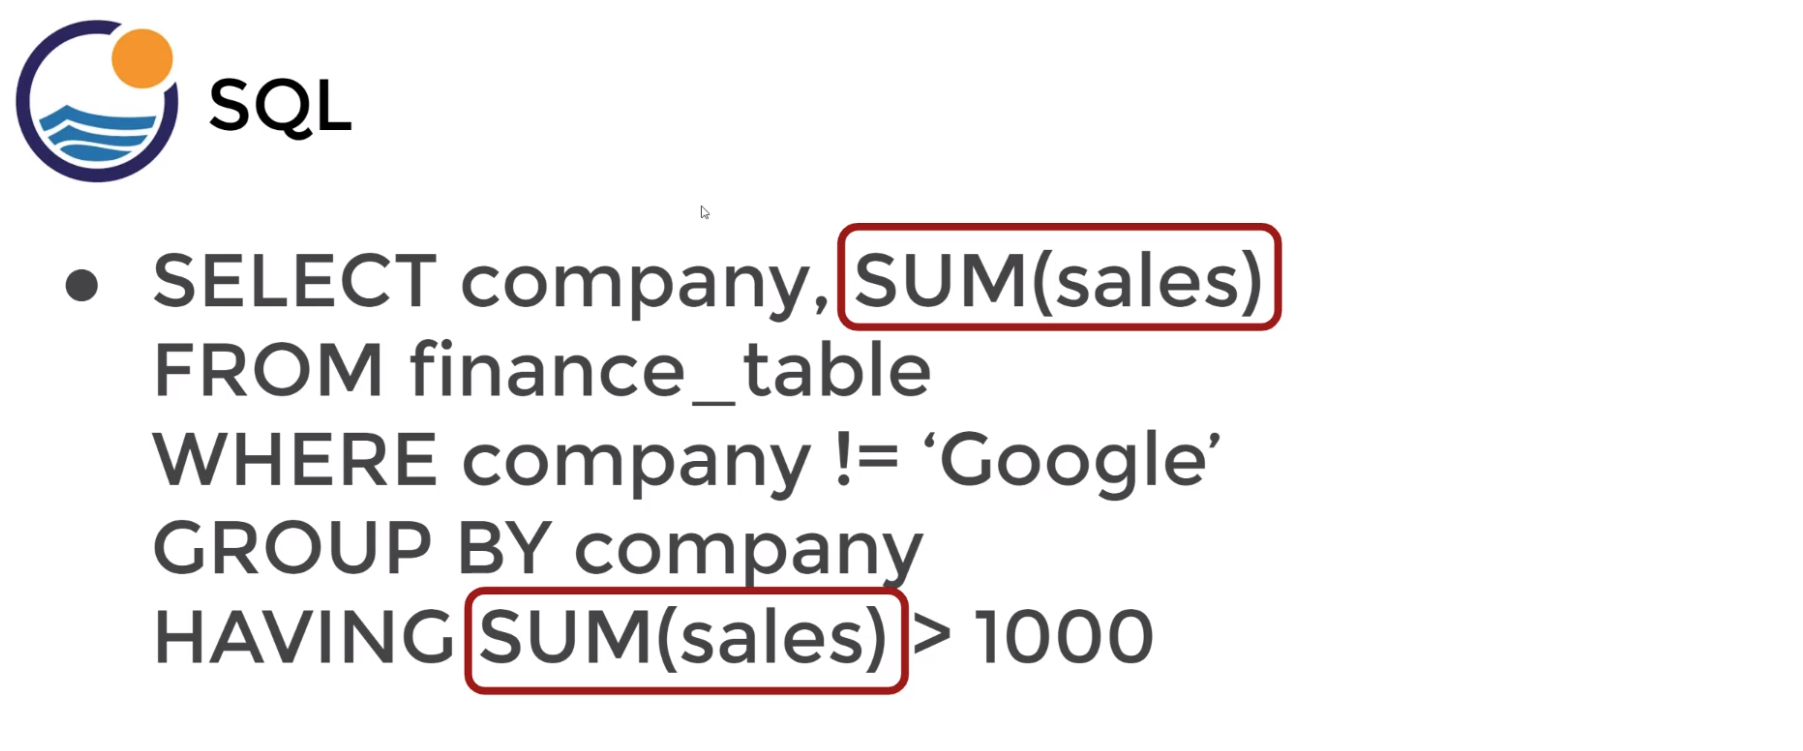

In [10]:
Image("../images/HAVING clarification 1.png")

Note, that you cannot use aliases with **`HAVING`** clauses.

In [11]:
with db_connection() as conn:
    conn.fetch_all("""SELECT customer_id,
                             SUM(amount) AS total_paid
                      FROM payment
                      GROUP BY customer_id
                      HAVING SUM(amount) > 100;""")

,customer_id,total_paid
0,87,137.72
1,477,106.79
2,273,130.72
3,550,151.69
4,51,123.70
...,...,...
291,434,122.74
292,211,146.67
293,536,109.77
294,520,127.69


In [12]:
with db_connection() as conn:
    conn.fetch_all("""SELECT store_id,
                             COUNT(customer_id) AS num_customers
                      FROM customer
                      GROUP BY store_id
                      HAVING COUNT(customer_id) > 300;""")

,store_id,num_customers
0,1,326
